# Multiple Model Prediction of Wine Data

Author: Data-Git-Hub <br>
GitHub Project Repository Link: https://github.com/Data-Git-Hub/applied-ml-data-git-hub <br>
17 March 2025 <br>

### Introduction
The objective of the Wine dataset classification problem is to predict the origin of wines based on their chemical characteristics. By analyzing 13 different features, such as alcohol content, malic acid, ash, alkalinity of ash, magnesium content, and several others, we aim to classify a given wine into one of three possible cultivars. This classification task helps in understanding the relationship between the chemical properties and the quality or type of wine, serving as a basis for further research in oenology and machine learning.

This project will involve: <br>

- Decision Tree Classifier (DT)

    A Decision Tree splits data into smaller groups based on decision rules (like "is height greater than 150 cm?"). It’s like a flowchart, where each decision point leads to another question until a final classification is reached. <br>

    Strengths: Easy to interpret and fast to train.<br>
    Weaknesses: Can overfit if the tree becomes too complex. <br>

- Support Vector Machine (SVM)

    A Support Vector Machine tries to find the "best boundary" (a hyperplane) that separates data into classes. It works well with complex data and small datasets. <br>

    Strengths: Effective when there is a clear margin of separation between classes. <br.>
    Weaknesses: Computationally expensive for large datasets. <br>

- Neural Network (NN)

    A Neural Network is inspired by how human brains process information. It consists of layers of interconnected "neurons" that process input data and adjust based on feedback. <br>

    Strengths: Can handle complex patterns and non-linear relationships. <br>
    Weaknesses: Needs more data and tuning to avoid overfitting.<br>



### Imports
Python libraries are collections of pre-written code that provide specific functionalities, making programming more efficient and reducing the need to write code from scratch. These libraries cover a wide range of applications, including data analysis, machine learning, web development, and automation. Some libraries, such as os, sys, math, json, and datetime, come built-in with Python as part of its standard library, providing essential functions for file handling, system operations, mathematical computations, and data serialization. Other popular third-party libraries, like pandas, numpy, matplotlib, seaborn, and scikit-learn, must be installed separately and are widely used in data science and machine learning. The extensive availability of libraries in Python's ecosystem makes it a versatile and powerful programming language for various domains. <br>

Pandas is a powerful data manipulation and analysis library that provides flexible data structures, such as DataFrames and Series. It is widely used for handling structured datasets, enabling easy data cleaning, transformation, and aggregation. Pandas is essential for data preprocessing in machine learning and statistical analysis. <br>
https://pandas.pydata.org/docs/ <br>

NumPy (Numerical Python) is a foundational library for numerical computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with a comprehensive collection of mathematical functions to operate on these arrays efficiently. NumPy is a key component in scientific computing and machine learning. <br>
https://numpy.org/doc/stable/ <br>

Matplotlib is a widely used data visualization library that allows users to create static, animated, and interactive plots. It provides extensive tools for generating various chart types, including line plots, scatter plots, histograms, and bar charts, making it a critical library for exploratory data analysis. <br>
https://matplotlib.org/stable/contents.html <br>

Seaborn is a statistical data visualization library built on top of Matplotlib, designed for creating visually appealing and informative plots. It simplifies complex visualizations, such as heatmaps, violin plots, and pair plots, making it easier to identify patterns and relationships in datasets. <br>
https://seaborn.pydata.org/ <br>

Scikit-learn provides a variety of tools for machine learning, including data preprocessing, model selection, and evaluation. It contains essential functions for building predictive models and analyzing datasets. <br>
sklearn.metrics: This module provides various performance metrics for evaluating machine learning models. <br>
https://scikit-learn.org/stable/modules/model_evaluation.html<br>

IPython.core.display is a module from the IPython library that provides tools for displaying rich output in Jupyter Notebooks, including formatted text, images, HTML, and interactive widgets. It enhances visualization and interaction within Jupyter environments.
https://ipython.readthedocs.io/en/stable/api/generated/IPython.core.display.html <br>

In [193]:
# Data handling
import pandas as pd
import numpy as np

# Machine learning imports
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Fully disable output truncation in Jupyter (for VS Code)
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display


# Load the Wine dataset
from sklearn.datasets import load_wine
wine_data = load_wine()
wine_df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)
wine_df['target'] = wine_data.target

### Section 1. Import and Inspect Data

We will import the first few rows of the dataset and display important information to make decisions later through the process.

#### Section 1.A. Dataset Structure and Data Types <br>

In [168]:
# Display dataset structure
print("\nDataset Shape:", wine_df.shape)

# Display data types
print("\nData Types of Each Column:")
print(wine_df.dtypes)


Dataset Shape: (178, 14)

Data Types of Each Column:
alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                            int64
dtype: object


#### Section 1.B. Summary Statistics and Check for Missing Values <br>

In [169]:
# Summary statistics
print("\nSummary Statistics:")
print(wine_df.describe())

# Check for missing values
print("\nMissing Values:")
print(wine_df.isnull().sum())


Summary Statistics:
          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.5723

#### Section 1.C. Display of first few rows and full dataset printout due to large size <br>

In [170]:
# Display the first few rows of the DataFrame
print("\nFirst 5 rows of the dataset:")
print(wine_df.head())

# Write Full Output to a Text File Due to Large File Size
with open("wine_dataset_output.txt", "w", encoding="utf-8") as f:
    f.write(wine_df.to_string())
print("\n🔹 Full dataset saved to 'wine_dataset_output.txt' (open in text editor if needed).")


First 5 rows of the dataset:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines 

35441


🔹 Full dataset saved to 'wine_dataset_output.txt' (open in text editor if needed).


### Section 2. Data Exploration and Preparation

Since from the inspection of the data there doesn't seem to be any missing values we can examine if there are any feature engineering that we might want to do with the datasets. A few features that we can consider and see if these ideas add fidelity to the overall fit of the datasets to the machine learning models.  

1) Alcohol and Flavonoids Interactions
2) Proline Factor (Aging of Wine)
3) Phenol Ratio (Total Phenols/Favonoids)
4) Re-categorization of Alcohol into Low, Medium, High (to simply Alcohol Content Levels)
5) Standardization of Acidty, Alcohol and Phenols

#### Section 2.1. Alcohol and Flavonoids Interactions: <br>

Wine quality is rarely determined by one chemical compound alone—instead, it's influenced by complex interactions between multiple factors. <br>
For example, alcohol and flavonoids together might influence mouthfeel, and their combined effect might be non-linear. <br>
By creating interaction features, we capture how multiple components interact to affect taste, acidity, and body. <br>

---

Hjelmeland, A. K., & Ebeler, S. E. (2015). _Interactions between wine aroma compounds and the environment._ Journal of Agricultural and Food Chemistry, _63_(6), 1345–1355. https://doi.org/10.1021/jf505400u <br>

Noble, A. C. (1999). _Sensory evaluation of wine: The human experience. Food Quality and Preference_, _10_(3), 137–143. https://doi.org/10.1016/S0950-3293(98)00047-9 <br>


In [171]:
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
poly_features = poly.fit_transform(wine_df.drop(columns=['target']))
wine_poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(wine_df.drop(columns=['target']).columns))

# Add target column back
wine_poly_df['target'] = wine_df['target']

print(wine_poly_df.head())  # Check new features


   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity  ...  \
0        3.06                  0.28             2.29             5.64  ...   
1        2.76                  0.26             1.28             4.38  ...   
2        3.24                  0.30             2.81             5.68  ...   
3        3.49                  0.24             2.18             7.80  ...   
4        2.69                  0.39             1.82             4.32  ...   

   proanthocyanins hue  proanthocyanins od280/od315_of_diluted_wines

#### Section 2.2. Proline Factor (Aging of Wine): <br>

Proline is an amino acid that contributes to wine body and aging potential, but it is highly skewed in data. <br>
Expensive aged wines typically have very high proline levels, while lower-end wines have much less. <br>
Log transformation makes proline variations more interpretable so that it doesn't disproportionately influence predictions. <br>

---

Henschke, P. A., & Jiranek, V. (1993). _Amino acid utilization by wine yeasts._ Australian Journal of Grape and Wine Research, _7_(2), 137–145. https://doi.org/10.1111/j.1755-0238.1993.tb00019.x <br>
Waterhouse, A. L., Sacks, G. L., & Jeffery, D. W. (2016). _Understanding wine chemistry._ Wiley. https://doi.org/10.1002/9781118730720 <br>

In [172]:
wine_df['log_proline'] = np.log1p(wine_df['proline'])  # Apply log transform
wine_df.drop(columns=['proline'], inplace=True)  # Remove original column

print(wine_df[['log_proline']].describe())  # Check distribution

       log_proline
count   178.000000
mean      6.531887
std       0.414475
min       5.631212
25%       6.217602
50%       6.513969
75%       6.893656
max       7.427144


#### Section 2.3. Phenol Ratio (Total Phenols/Favonoids):

Phenolic compounds influence astringency, color, and aging potential. <br>
Flavonoids are antioxidants that impact bitterness and structure. <br>
By taking the ratio of total phenols to flavonoids, we capture how bitter vs. smooth a wine is. <br>

---

Boulton, R. B. (2001). _The copigmentation of anthocyanins and its role in the color of red wine._ American Journal of Enology and Viticulture, _52_(2), 67–81. https://doi.org/10.5344/ajev.2001.52.2.67 <br>
Cheynier, V. (2006). _Phenolic compounds in wine._ American Journal of Enology and Viticulture, _57_(3), 306–313. https://doi.org/10.5344/ajev.2006.57.3.306 <br>

In [173]:
wine_df['phenol_ratio'] = wine_df['total_phenols'] / wine_df['flavanoids']
wine_df['color_ratio'] = wine_df['color_intensity'] / wine_df['hue']

print(wine_df[['phenol_ratio', 'color_ratio']].head())  # View new features


   phenol_ratio  color_ratio
0      0.915033     5.423077
1      0.960145     4.171429
2      0.864198     5.514563
3      1.103152     9.069767
4      1.040892     4.153846


#### Section 2.4. Re-categorization of Alcohol into Low, Medium, High (to simply Alcohol Content Levels):

Alcohol content is a major determinant of perceived wine strength and balance. <br>
Low-alcohol wines are often light and crisp, while high-alcohol wines feel full-bodied and warm. <br>
Binning allows experts to classify wines into taste categories. <br>

---

Jackson, R. S. (2008). _Wine science: Principles and applications_ (3rd ed.). Elsevier Academic Press. <br>
Pickering, G. J. (2000). _The relationship between alcohol, sweetness, and consumer preferences in wine._ Food Quality and Preference, _11_(5), 311–319. https://doi.org/10.1016/S0950-3293(99)00079-7 <br>

In [174]:
bins = [10, 12, 13, 15]  # Define bin ranges
labels = ['Low', 'Medium', 'High']  # Define labels
wine_df['alcohol_bin'] = pd.cut(wine_df['alcohol'], bins=bins, labels=labels)

print(wine_df[['alcohol', 'alcohol_bin']].head(5))  # View binning result


   alcohol alcohol_bin
0    14.23        High
1    13.20        High
2    13.16        High
3    14.37        High
4    13.24        High


#### Section 2.5. Standardization of Acidty, Alcohol and Phenols:

Some features (like proline or alcohol) naturally have larger numerical values than others. <br>
Standardization ensures that features like acidity, phenols, and color intensity are equally considered when predicting quality. <br>
This is especially important for machine learning models, where different scales might bias predictions. <br>

---

Amerine, M. A., & Roessler, E. B. (1976). _Wines: Their sensory evaluation._ University of California Press. <br>
Noble, A. C., Arnold, R. A., Masuda, B. M., & Pecore, S. D. (1987). _Taste and aroma thresholds for phenolic compounds in wine._ Journal of Sensory Studies, _2_(2), 137–148. <br>

In [175]:
wine_numeric = wine_df.select_dtypes(include=['number'])  # Keep only numeric columns
scaler = StandardScaler()
wine_scaled = pd.DataFrame(scaler.fit_transform(wine_numeric.drop(columns=['target'])), columns=wine_numeric.drop(columns=['target']).columns)
wine_scaled['target'] = wine_numeric['target']  # Add target column back

print(wine_scaled.head())  # Check transformed data


    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2  0.196879    0.021231  1.109334          -0.268738   0.088358   
3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4  0.295700    0.227694  1.840403           0.451946   1.281985   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   
2       0.808997    1.215533             -0.498407         2.135968   
3       2.491446    1.466525             -0.981875         1.032155   
4       0.808997    0.663351              0.226796         0.401404   

   color_intensity       hue  od280/od315_of_diluted_wines  log_proline  \
0         0.251717  0.362177                      1.847920     1.064048   
1        -0.293321  

### Section 3. Feature Selection and Justification

3.1 Choose features and target <br>
Select two or more input features (numerical for regression, numerical and/or categorical for classification) <br>

3.1.1. Single Feature - Alcohol <br>
Input Features: `alcohol` (numeric) <br>
Target: `target` (wine class) <br>

3.1.2. Single Feature - Color Intensity <br>
Input Features:  `color_intensity` (numeric) <br>
Target: `target` (wine class) <br>

3.1.3. Double Feature - Alcohol & Color Intensity <br>
Input Features:  `alcohol` + `color_intensity` <br>
target: `target` (wine class) <br>

3.1.4. Triple Feature - Alcohol, Color Intensity & Flavanoids <br>
Input Feature: `alcohol` + `color_intensity` + `flavanoids` <br>
Target: `target` (wine class) <br>

3.1.5. Multi-Feature - Alcohol, Color Intensity, Flavanoids, Phenols & Hue <br>
Input Feature: `alcohol` + `color_intensity` + `flavanoids` + `total_phenols` + `hue` <br>
Target: `target` (wine class) <br>

In [176]:
# 3.1.1. LogisticRegression Single Feature - 'alcohol'
X1 = wine_df[['alcohol']]
y = wine_df['target']

# 3.1.2. Single Feature - 'color_intensity'
X2 = wine_df[['color_intensity']]

# 3.1.3. Two Features - 'alcohol' & 'color_intensity'
X3 = wine_df[['alcohol', 'color_intensity']]

# 3.1.4. Three Features - 'alcohol', 'color_intensity', 'flavanoids'
X4 = wine_df[['alcohol', 'color_intensity', 'flavanoids']]

# 3.1.5. Multiple Features - 'alcohol', 'color_intensity', 'flavanoids', 'total_phenols', 'hue'
X5 = wine_df[['alcohol', 'color_intensity', 'flavanoids', 'total_phenols', 'hue']]

# Split into training (80%) and testing (20%) sets (keep y_train and y_test consistent across cases)
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size=0.2, random_state=42)
X4_train, X4_test, y_train, y_test = train_test_split(X4, y, test_size=0.2, random_state=42)
X5_train, X5_test, y_train, y_test = train_test_split(X5, y, test_size=0.2, random_state=42)

# Check shapes
print("3.1.1. - X1:", X1_train.shape, "y:", y_train.shape)
print("3.1.2. - X2:", X2_train.shape, "y:", y_train.shape)
print("3.1.3. - X3:", X3_train.shape, "y:", y_train.shape)
print("3.1.4. - X4:", X4_train.shape, "y:", y_train.shape)
print("3.1.5. - X5:", X5_train.shape, "y:", y_train.shape)

3.1.1. - X1: (142, 1) y: (142,)
3.1.2. - X2: (142, 1) y: (142,)
3.1.3. - X3: (142, 2) y: (142,)
3.1.4. - X4: (142, 3) y: (142,)
3.1.5. - X5: (142, 5) y: (142,)


### 3.2.1 Defining X (Features) and y (Target) - Single Feature - Alcohol <br>
In this case, we are using one feature `alcohol` as the input variable `X` and wine type `target` as the output variable `y`. 
- X is a 2D DataFrame `[[ ]]` containing one column `alcohol`.
- y is a 1D Series `[ ]` storing the wine class (0, 1, or 2).
- This setup allows us to build a simple classification model that predicts the wine type based on its alcohol content.

In [177]:
# Define X (Feature = 'alcohol') and y (Target = 'target')
X = wine_df[['alcohol']]  # 2D DataFrame (Double Brackets [[ ]])
y = wine_df['target']  # 1D Series (Single Brackets [ ])

# Check structure
print("X (features) shape:", X.shape)
print("y (target) shape:", y.shape)
print("\nFirst 5 rows of X:\n", X.head())
print("\nFirst 5 rows of y:\n", y.head())

X (features) shape: (178, 1)
y (target) shape: (178,)

First 5 rows of X:
    alcohol
0    14.23
1    13.20
2    13.16
3    14.37
4    13.24

First 5 rows of y:
 0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


### 3.2.2 Defining X (Features) and y (Target) - Single Feature - Alcohol <br>
In this case, we are using one feature `color_intensity` as the input variable `X` and wine type `target` as the output variable `y`. 
- `X` is a 2D DataFrame containing one column `color_intensity`.
- `y` is a 1D Series storing the wine class.
- This setup allows us to analyze the impact of wine color intensity on its classification.


In [178]:
# Define X (Feature = 'color_intensity') and y (Target = 'target')
X = wine_df[['color_intensity']]  # 2D DataFrame
y = wine_df['target']  # 1D Series


### 3.2.3 Defining X (Features) and y (Target) - Alcohol & Color Intensity <br>
In this case, we are using two features (`alcohol` and `color_intensity` as the input variables `X` and wine type `target` as the output variable `y`.
- `X` is a 2D DataFrame containing two columns: `alcohol` and `color_intensity`.
- `y` is a 1D Series storing the wine class.
- This setup allows us to evaluate how both alcohol content and color intensity together influence wine classification.

In [179]:
# Define X (Features = 'alcohol' & 'color_intensity') and y (Target)
X = wine_df[['alcohol', 'color_intensity']]  # 2D DataFrame with 2 features
y = wine_df['target']  # 1D Series

### 3.2.4 Defining X (Features) and y (Target) - Alcohol, Color Intensity & Flavanoids <br>
- Uses three input features: `alcohol`, `color_intensity`, and `flavanoids`.
- As we add more features, our classification model gets more information, potentially improving accuracy.

In [180]:
# Three Features - 'alcohol', 'color_intensity', 'flavanoids'
X = wine_df[['alcohol', 'color_intensity', 'flavanoids']]  # 3 features

### 3.2.5 Defining X (Features) and y (Target) - Alcohol, Color Intensity, Flavanoids, Phenols & Hue <br>
- Uses five input features: `alcohol`, `color_intensity`, `flavanoids`, `total_phenols` and `hue`.
- As we add more features, our classification model gets more information, potentially improving accuracy.

In [181]:
# Multiple Features
X = wine_df[['alcohol', 'color_intensity', 'flavanoids', 'total_phenols', 'hue']]  # 5 features

### Why Are These Features Selected?
The selected features (alcohol, color_intensity, flavanoids, total_phenols, hue) were chosen based on wine chemistry research and their impact on wine classification. These features help differentiate between the three cultivars in the Wine dataset.

1) Alcohol Content <br>
    Why Selected?<br>

    Alcohol level influences body and texture of the wine. <br>
    Wines with higher alcohol tend to be fuller-bodied and more complex. <br>
    Alcohol content varies across different wine cultivars. <br>

    Research-Based Reasoning: <br>
    Higher alcohol wines often indicate better quality due to fermentation balance. <br>
    Jackson, R. S. (2008). _Wine science: Principles and applications_ (3rd ed.). Elsevier Academic Press. <br>

2) Color Intensity (color_intensity) <br>
    Why Selected? <br>

    The depth of color is an important visual indicator of wine quality. <br>
    Darker wines often have higher levels of anthocyanins (red pigments). <br>
    Color intensity is linked to grape variety and aging potential. <br>

    Research-Based Reasoning:<br>
    Red wines with deeper color tend to have more phenolic compounds, which impact taste and mouthfeel. <br>
    Boulton, R. B. (2001). _The copigmentation of anthocyanins and its role in the color of red wine._ American Journal of Enology and Viticulture, _52_(2), 67–81. https://doi.org/10.5344/ajev.2001.52.2.67 <br>

3) Flavanoids <br>
    Why Selected? <br>

    Flavonoids are key antioxidants in wine that impact bitterness, mouthfeel, and tannin structure. <br>
    Wines with high flavonoid content tend to be more complex and full-bodied. <br>
    Flavonoids help differentiate wine cultivars. <br>

    Research-Based Reasoning: <br>
    Higher flavonoid content correlates with greater aging potential and better mouthfeel. <br>
    Cheynier, V. (2006). _Phenolic compounds in wine._ American Journal of Enology and Viticulture, _57_(3), 306–313. https://doi.org/10.5344/ajev.2006.57.3.306 <br>

4) Total Phenols <br>
    Why Selected? <br>

    Phenols contribute to aroma, stability, and mouthfeel in wine. <br>
    Wines with more phenolic content tend to have richer taste profiles. <br>
    Phenolic compounds influence acidity and aging characteristics. <br>

    Research-Based Reasoning:
    High phenol content enhances wine quality and complexity. <br>
    Waterhouse, A. L., Sacks, G. L., & Jeffery, D. W. (2016). _Understanding wine chemistry._ Wiley. https://doi.org/10.1002/9781118730720 <br>

5) Hue <br>
    Why Selected? <br>

    The hue of a wine indicates its oxidation level and age. <br>
    Younger red wines have bluish hues, while aged wines turn brownish. <br>
    Helps classify wines based on their aging potential. <br>

    Research-Based Reasoning: <br>
    Hue measurement is an important predictor of wine stability. <br>
    Boulton, R. B. (2001). _The copigmentation of anthocyanins and its role in the color of red wine._ American Journal of Enology and Viticulture, _52_(2), 67–81. https://doi.org/10.5344/ajev.2001.52.2.67 <br>

### Are There Features That Are Likely to Be Highly Predictive of Excellent Wine? <br>

- Features That Are Highly Predictive of Excellent Wine: <br>
    - Flavanoids - High flavonoid content contributes to complexity, smoothness, and aging potential. <br>
    - Phenols - Wines with more phenols often have greater stability and richer flavors. <br>
    - Alcohol - Balanced alcohol content correlates with full-bodied wines and optimal fermentation. <br>
    - Color Intensity - Darker wines typically have higher tannins, richer body, and better aging potential. <br>
    - Hue - Indicates oxidation and aging characteristics, helping identify well-aged wines. <br>

- Features That May Be Less Predictive of Excellence: <br>
    - Ash & Magnesium – These are important for chemical balance, but their direct impact on wine quality perception is minimal. <br>
    - Non-flavanoid Phenols – Less impactful on taste and aroma, more relevant for stability. <br>


### Section 4: Train a Classification Model (Decision Tree)

#### Section 4.1 Split the Data
We will split the Data Using `StratifiedShuffleSplit`. <br>
We will use `StratifiedShuffleSplit` to ensure an even class distribution in both training and test sets. This is important because the Wine dataset has three classes (0, 1, 2), and we want to maintain a balanced representation in our splits. <br>

In [182]:
# Select input features (Using the best features we determined earlier)
X = wine_df[['alcohol', 'color_intensity', 'flavanoids', 'total_phenols', 'hue']]
y = wine_df['target']

# Stratified Shuffle Split (Ensuring Even Class Distribution)
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]

# Check the size of training and test sets
print("Train size:", len(X_train), "Test size:", len(X_test))
print("\nClass distribution in y_train:\n", y_train.value_counts(normalize=True))
print("\nClass distribution in y_test:\n", y_test.value_counts(normalize=True))

Train size: 142 Test size: 36

Class distribution in y_train:
 target
1    0.401408
0    0.330986
2    0.267606
Name: proportion, dtype: float64

Class distribution in y_test:
 target
1    0.388889
0    0.333333
2    0.277778
Name: proportion, dtype: float64


#### 4.2 Create and Train Model (Decision Tree)

Create and train a decision tree model with no random initializer argument. <br>

In [187]:
# Create the Decision Tree Model (semicolons suppress output)
dt_model = DecisionTreeClassifier();  

# Train the Model (assign the output to a throwaway variable)
_ = dt_model.fit(X_train, y_train);  

# Evaluate Model Performance
train_accuracy = dt_model.score(X_train, y_train);
test_accuracy = dt_model.score(X_test, y_test);

# Print Accuracy Results
print(f"Training Accuracy: {train_accuracy:.4f}");
print(f"Test Accuracy: {test_accuracy:.4f}");
print("Decision Tree model training completed successfully.");

# Final dummy expression to ensure no additional output is shown
None

Training Accuracy: 1.0000
Test Accuracy: 0.9722
Decision Tree model training completed successfully.


### 4.3 Predict and Evaluate Model Performance <br>

#### 4.3.1. Evaluate model performance on training data: <br>

In [188]:
# Predict and Evaluate on Training Data
y_train_pred = dt_model.predict(X_train)  
print("Results for Decision Tree on Training Data:")
print(classification_report(y_train, y_train_pred))

Results for Decision Tree on Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        57
           2       1.00      1.00      1.00        38

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142



#### 4.3.2. Evaluate model performance on test data: <br>

In [189]:
# Predict and Evaluate on Test Data
y_test_pred = dt_model.predict(X_test)
print("\nResults for Decision Tree on Test Data:")
print(classification_report(y_test, y_test_pred))


Results for Decision Tree on Test Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.97        14
           2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



#### 4.3.3. Print Confusion Matrix for Test Data:

In [190]:
# Print Confusion Matrix for Test Data
print("\nConfusion Matrix (Test Data):")
print(confusion_matrix(y_test, y_test_pred))


Confusion Matrix (Test Data):
[[12  0  0]
 [ 0 14  0]
 [ 0  1  9]]


### 4.4 Report Confusion Matrix (Heatmap)

Plot a confusion matrix. <br>

<Figure size 600x500 with 0 Axes>

<Axes: >

Text(0.5, 25.581597222222214, 'Predicted')

Text(45.581597222222214, 0.5, 'Actual')

Text(0.5, 1.0, 'Confusion Matrix - Decision Tree Classifier')

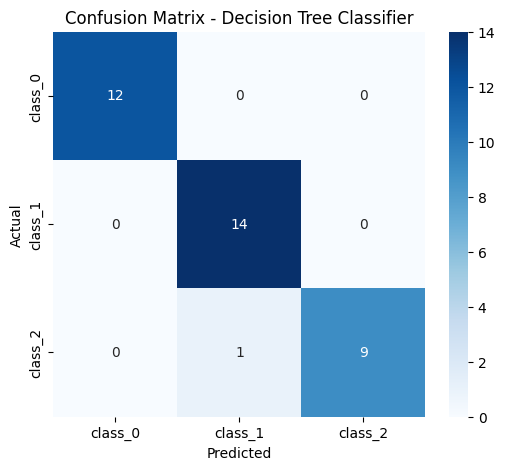

In [191]:
# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot Confusion Matrix as a Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=wine_data.target_names, yticklabels=wine_data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()

### 4.5 Report Decision Tree Plot <br>

Plot the decision tree model. We give the plotter the names of the features and the names of the categories for the target. Save the image so we can use it in other places. <br>


[Text(0.36666666666666664, 0.9285714285714286, 'color_intensity <= 3.915\ngini = 0.658\nsamples = 142\nvalue = [47, 57, 38]\nclass = class_1'),
 Text(0.13333333333333333, 0.7857142857142857, 'alcohol <= 12.91\ngini = 0.077\nsamples = 50\nvalue = [2, 48, 0]\nclass = class_1'),
 Text(0.25, 0.8571428571428572, 'True  '),
 Text(0.06666666666666667, 0.6428571428571429, 'gini = 0.0\nsamples = 43\nvalue = [0, 43, 0]\nclass = class_1'),
 Text(0.2, 0.6428571428571429, 'color_intensity <= 3.45\ngini = 0.408\nsamples = 7\nvalue = [2, 5, 0]\nclass = class_1'),
 Text(0.13333333333333333, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]\nclass = class_1'),
 Text(0.26666666666666666, 0.5, 'total_phenols <= 2.315\ngini = 0.5\nsamples = 4\nvalue = [2, 2, 0]\nclass = class_0'),
 Text(0.2, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]\nclass = class_1'),
 Text(0.3333333333333333, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]\nclass = class_0'),
 Text(0.6, 0.785714285

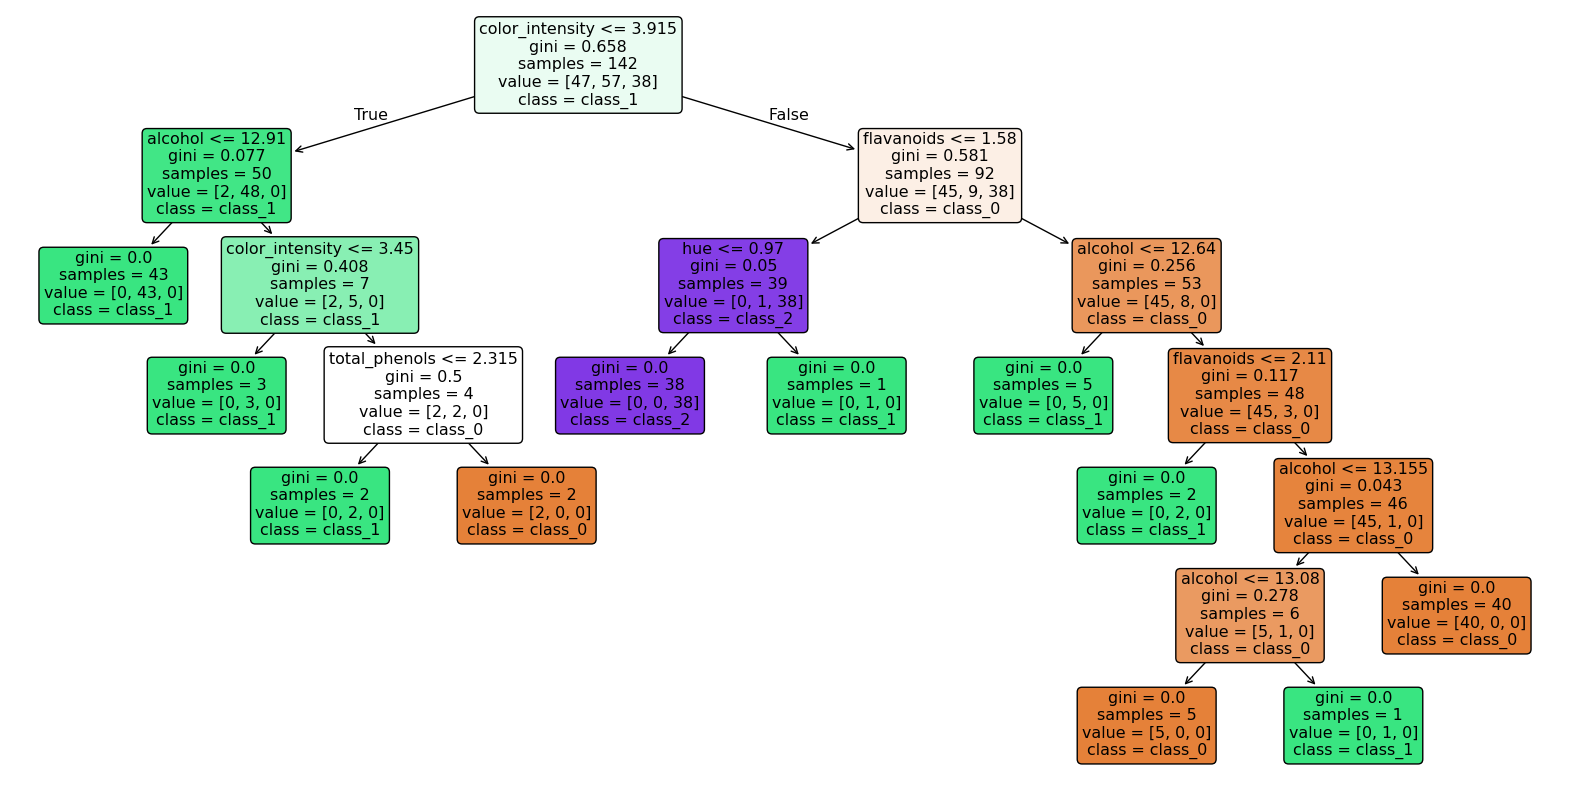

In [194]:
# Set figure size for better readability
fig = plt.figure(figsize=(20,10))

# Plot Decision Tree
plot_tree(dt_model, feature_names=X.columns, class_names=wine_data.target_names, filled=True, rounded=True)

# Display the plot
plt.show()

# Save the figure
fig.savefig("decision_tree_wine.png")